In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fs=19						#fontsize for labels, legend, ...
font={'family' : 'serif', 'size' : fs}		#define font for legend
plt.rc('font', **font)


from https://www.google.de/publicdata/explore?ds=d5bncppjof8f9_&met_y=eg_use_elec_kh_pc&hl=de&dl=de#!ctype=l&strail=false&bcs=d&nselm=h&met_y=eg_use_pcap_kg_oe&scale_y=lin&ind_y=false&rdim=country&idim=country:USA&ifdim=country:region:NAC&tstart=-313549200000&tend=1453676400000&hl=de&dl=de&ind=false

In [2]:
umrechnung=11.63 #kWh/a/Kopf   pro kg Öl
years=np.array([2014, 2005, 1980]) #2014 is max. available, rest random
pop=np.array([7.269e9, 6.517e9, 4.4377e9])
EpK_oel=np.array([1920.7e3, 1765.62e3, 1452.93e3])

In [3]:
EpK=umrechnung*EpK_oel
E=pop*EpK #Wh/a
P=E*1./(365*24)/(4*np.pi*6371000**2)
P

array([0.03633998, 0.02994991, 0.01678237])

In [4]:
def get_growth(y0, y1, x0, x1):
    return (x1/x0)**(1./(y1-y0))
g80_05=get_growth(years[2], years[1], E[2], E[1])
g05_14=get_growth(years[1], years[0], E[1], E[0])
g80_14=get_growth(years[2], years[0], E[2], E[0])

print(g80_05, g05_14, g80_14)


(1.0234383653107653, 1.0217205730508794, 1.0229833747308328)


In [5]:
EpK_oel_USA=6956.81e3 #2014
EpK_USA=umrechnung*EpK_oel_USA
E_WorldIsUSA_tod=pop[0]*EpK_USA #Wh/a #2014
P_WorldIsUSA_tod=E_WorldIsUSA_tod*1./(365*24)/(4*np.pi*6371000**2)
P_WorldIsUSA_tod

0.13162407906534093

In [6]:
P_WorldIsUSA_10bio=10e9/pop[0] * P_WorldIsUSA_tod
P_WorldIsUSA_10bio

0.18107591011877966

In [7]:
#when did we have 0.034
def get_P(EpK_oel, pop):
    EpK=umrechnung*EpK_oel
    E=pop*EpK #Wh/a
    P=E*1./(365*24)/(4*np.pi*6371000**2)
    return P
#2012
EpK_oel=1891.41e3 #Wh/Kopf/a
pop=7.0974e9
get_P(EpK_oel, pop)
#2011
pop=7.0128e9
EpK_oel=1879.35e3
P_2011=get_P(EpK_oel, pop)
#2010
EpK_oel=1872.52e3
pop=6.9307e9
P_2010=get_P(EpK_oel, pop)
print("IN 2010 we had: P_hum="+str(P_2010))
print("In 2011 we had: P_hum="+str(P_2011))
print("Result: I take 2010 as reference!")

IN 2010 we had: P_hum=0.0337795686797
In 2011 we had: P_hum=0.0343043864346
Result: I take 2010 as reference!


In [8]:
def P_hum(g, t):
    return 0.034*(float(g)/100+1)**(t-2010)

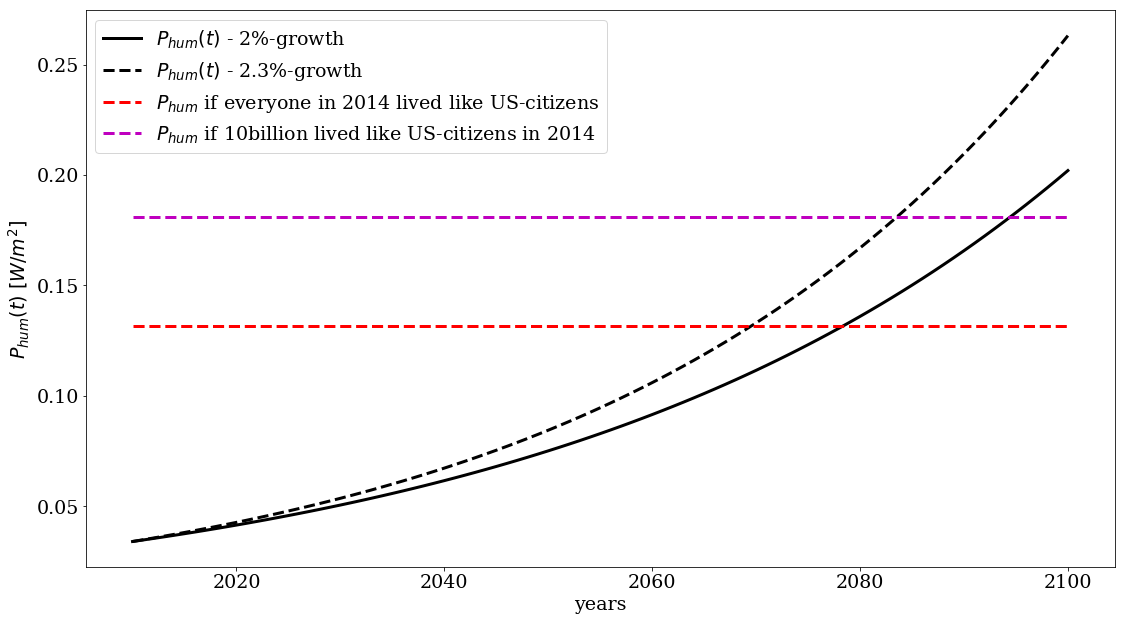

In [9]:
years=np.linspace(2010, 2100, num=91)
fig=plt.figure(figsize=(16,9))
ax=fig.add_subplot(111)
ax.plot(years, P_hum(2, years), '-k', label=r'$P_{hum}(t)$ - 2%-growth', lw=3)#
ax.plot(years, P_hum(2.3, years), '--k', label=r'$P_{hum}(t)$ - 2.3%-growth', lw=3)#
ax.plot(years, [P_WorldIsUSA_tod for y in years], '--r',
        label=r'$P_{hum}$ if everyone in 2014 lived like US-citizens', lw=3)
ax.plot(years, [P_WorldIsUSA_10bio for y in years], '--m',
        label=r'$P_{hum}$ if 10billion lived like US-citizens in 2014', lw=3)
ax.legend()
ax.set_xlabel("years")
ax.set_ylabel(r'$P_{hum}(t)\ [W/m^2]$')
plt.tight_layout()

# THIS IS NEW NOW

In [10]:
data1=np.loadtxt("world_only_Energy_use.txt")
years1=data1[0]
energy_use=data1[1][:]
data2=np.loadtxt("world_only_Pop.txt")
years2=data2[0][:-2]
pop=data2[1][:-2]
if len(years2)!=len(years1):
    print("not the same length")


In [11]:
umrechnung=11.63 #kWh/a/Kopf   pro kg Öl
tot_E=umrechnung*energy_use*pop*1e3
P_hum_past=tot_E*1./(365*24)/(4*np.pi*6371000**2)

In [12]:
#plt.plot(years1, tot_E, '--r')

[0.02355933 0.01345881]


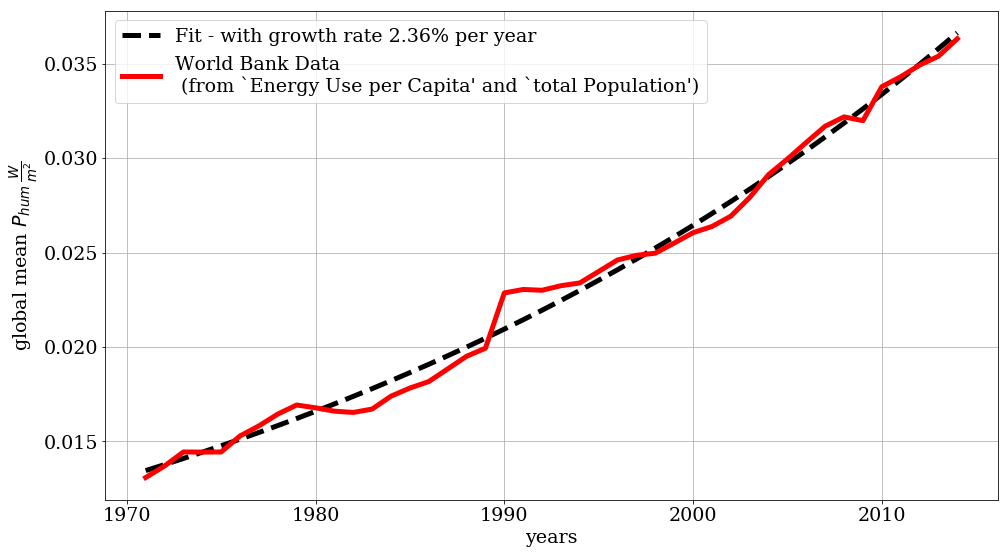

In [13]:
import scipy.optimize as opt
def f(y, a, b):
    return (1.00+a)**(y-y[0]) *b 
popt, pcov=opt.curve_fit(f, years1, P_hum_past, bounds=([0.00, 0], [1, np.inf]))
fig=plt.figure(figsize=(16,9))
ax=fig.add_subplot(111)
ax.plot(years1, f(years1, *popt), '--k', lw=5,  label='Fit - with growth rate '+'%.2f' % (popt[0]*100)+"% per year")
ax.plot(years1, P_hum_past, '-r', lw=5, label="World Bank Data \n (from `Energy Use per Capita' and `total Population')")
ax.grid()
ax.legend()
ax.set_ylabel(r"global mean $P_{hum}\, \frac{W}{m^2}$")
ax.set_xlabel(r"years")
plt.savefig("P_hum_data_world_bank.png")
print(popt)

In [14]:
print(P_hum)

<function P_hum at 0x7f7a89eb22a8>


 # COMBINED

In [15]:
import matplotlib.gridspec as gridspec

/home/peter/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


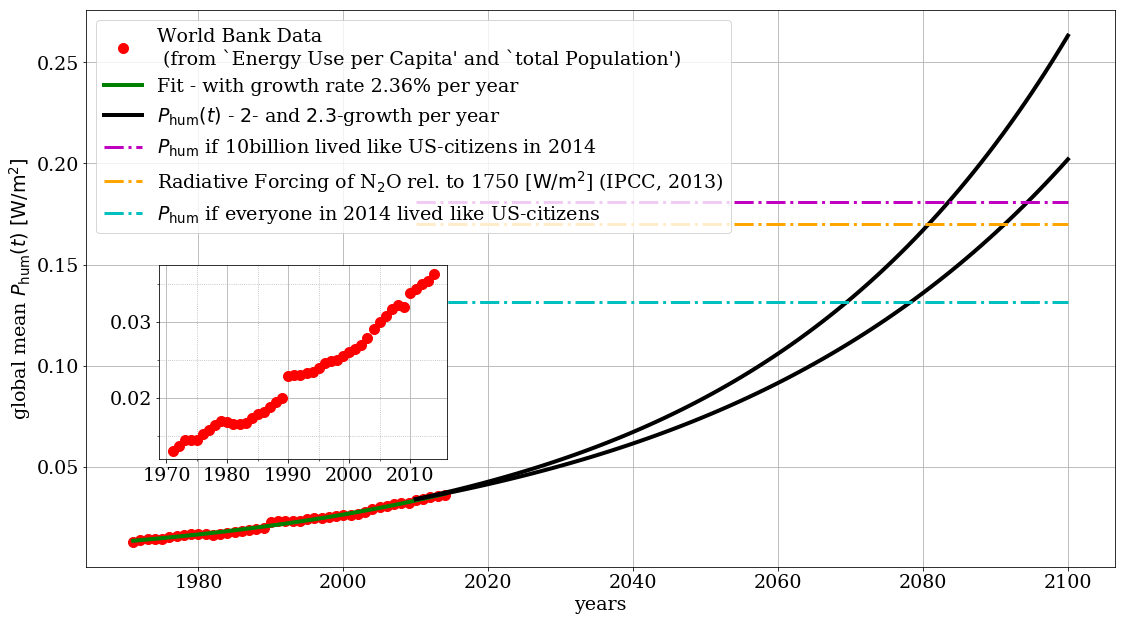

In [16]:
years=np.linspace(2010, 2100, num=91)
fig=plt.figure(figsize=(16,9))
ax=fig.add_subplot(111)
ax.plot(years1, P_hum_past, 'o', color='red', markersize=10, label="World Bank Data \n (from `Energy Use per Capita' and `total Population')")

ax.plot(years1, f(years1, *popt), '-g', lw=4, label='Fit - with growth rate '+'%.2f' % (popt[0]*100)+"% per year")

ax.plot(years, P_hum(2, years), '-k', label=r'$P_{\rm hum}(t)$ - $2%$- and $2.3%$-growth per year', lw=4)#
ax.plot(years, P_hum(2.3, years), '-k', lw=4)#label=r'$P_{hum}(t)$ - 2.3%-growth per year'

ax.plot(years, [P_WorldIsUSA_10bio for y in years], '-.m', #markersize=15,
        label=r'$P_{\rm hum}$ if 10billion lived like US-citizens in 2014', lw=3)
ax.plot(years, [0.17 for y in years], '-.', color='orange',
        label=r'Radiative Forcing of N$_2$O rel. to 1750 [${\rm W/m^2}$] (IPCC, 2013)', lw=3)
ax.plot(years, [P_WorldIsUSA_tod for y in years], '-.c', #markersize=15,
        label=r'$P_{\rm hum}$ if everyone in 2014 lived like US-citizens', lw=3)

ax.grid()
ax.legend()
ax.set_ylabel(r"global mean $P_{\rm hum}(t)\ [{\rm W/m^2}]$")
ax.set_xlabel(r"years")

#ax2=fig.add_subplot(12,20,121)

#gs = gridspec.GridSpec()
#print(gs)
#ax2.set_position(gs[0:2].get_position(fig))
#ax2.set_subplotspec(gs[0:2]) 

#ax2=plt.subplot2grid()
#ax2 = fig.subplot2grid((3,1), (2,0), rowspan=2)
left, bottom, width, height = [0.15, 0.27, 0.25, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.set_yticks(ax2.get_yticks(), minor=True)
#ax2.grid(b=True, which='minor')
ax2.minorticks_on()
ax2.set_yticks([0.015, 0.025, 0.035], minor=True)
ax2.set_xticks([1975, 1985, 1995, 2005], minor=True)
ax2.grid(b=True, which='major')
ax2.grid(b=True, which='minor', linestyle=':')

#pos=ax2.get_position()'
#print(pos)
#ax2.set_position([0., 0., 1, 1]) # [left, bottom, width, height] 
#pos=ax2.get_position()
#print(pos)
ax2.plot(years1, P_hum_past, 'o', markersize=10, color='red')
plt.tight_layout()
plt.savefig("P_hum_dataANDprojection.png")

In [17]:
help(gs)

NameError: name 'gs' is not defined

In [18]:
growth_rate=(P_hum_past[1:]-P_hum_past[:-1])/P_hum_past[:-1]

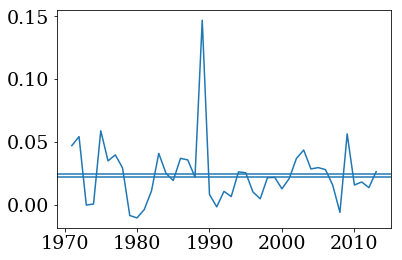

In [19]:
plt.plot(years1[:-1], growth_rate)
plt.axhline(y=0.022)
plt.axhline(y=0.024)

In [20]:
eta_mean=np.mean(growth_rate)
eta_mean

0.024322594562350596

In [21]:
eta_mean_2000s=np.mean(growth_rate[-14:])

In [22]:
eta_mean_2000s

0.02411621474444273

In [23]:
from scipy.signal import savgol_filter
yhat = savgol_filter(growth_rate, len(growth_rate), 3) 

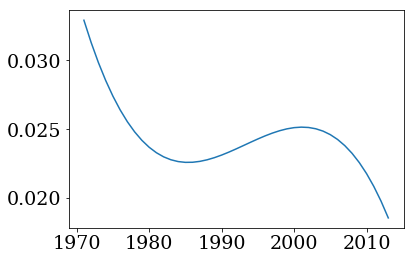

In [24]:
plt.plot(years1[:-1], yhat)

In [25]:
years1[39]

2010.0

In [26]:
eta_mean_1970s=np.mean(growth_rate[1:9])
eta_mean_1980s=np.mean(growth_rate[9:20])
eta_mean_1990s=np.mean(growth_rate[21:30])
eta_mean_2000s=np.mean(growth_rate[31:])

In [27]:
print(eta_mean_1970s, eta_mean_1980s, eta_mean_1990s, eta_mean_2000s)

(0.025946975322598424, 0.029996176290731293, 0.015359436112897437, 0.025365964962899945)


In [84]:
growth_rate

array([ 0.04687623,  0.05408948, -0.00042308,  0.00040002,  0.05875107,
        0.03475614,  0.03953712,  0.02921868, -0.00875364, -0.01067162,
       -0.00399167,  0.01086118,  0.04075351,  0.02481296,  0.0191445 ,
        0.03676958,  0.0355422 ,  0.0218804 ,  0.14679017,  0.00806672,
       -0.00185178,  0.01047768,  0.00635732,  0.02597405,  0.02531952,
        0.01000633,  0.00455048,  0.02138203,  0.02161895,  0.01254855,
        0.02068687,  0.03673111,  0.04337617,  0.02834429,  0.02939324,
        0.02783291,  0.01555741, -0.0062592 ,  0.05626543,  0.0155497 ,
        0.01793629,  0.0134788 ,  0.02618544])

In [85]:
np.mean(growth_rate)

0.024322594562350596